In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def order_Gibbs(x0,sigma,N,K):
    '''
    x0 : the starting point
    sigma : St. D
    N : Random steps
    K : sampling Size
    '''
    x1 = x0
    Listx = np.zeros(2*N+1)
    Listy = np.zeros(2*N+1)
    Listx[0], Listy[0] = x0
    for i in range(N):
        samplex=list(np.random.normal(loc=0.998*x0[1], scale=sigma,size=K))
        samplex.append(x0[0])
        nsamplex=np.sort(samplex)
        xi_x = np.where(nsamplex == x0[0])[0][0]
        x1[0]= nsamplex[K-xi_x]
        Listx[2*i+1] = x1[0]
        Listy[2*i+1] = x0[1]
        sampley=list(np.random.normal(loc=0.998*x1[0], scale=sigma,size=K))
        sampley.append(x0[1])
        nsampley=np.sort(sampley)
        xi_y = np.where(nsampley == x0[1])[0][0]
        x1[1]=nsampley[K-xi_y]
        Listx[2*i+2] = x1[0]
        Listy[2*i+2] = x1[1]
        x0=x1
    return Listx,Listy

In [9]:
X,Y=order_Gibbs(x0=[-1.3,-1.3],sigma=0.04459,N=50,K=50)

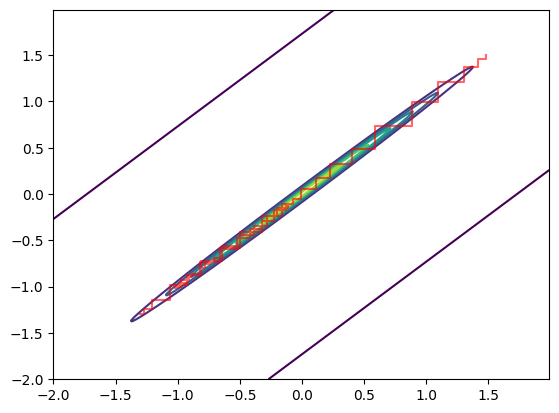

In [10]:
plt.figure()
x1 = np.arange(-2.0, 2.0, 0.01)
x2 = np.arange(-2.0, 2.0, 0.01)
X1, X2 = np.meshgrid(x1, x2)
plt.contour(X1,X2,np.exp(-(250.25*X1*X1-2*249.75*X1*X2+250.25*X2*X2)))
plt.plot(X,Y,color='red',alpha=0.6,label='Random walk')